<a href="https://colab.research.google.com/github/StratosFair/DNN_Classifiers_Fast_Rates/blob/main/cifar10_auto_truck_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

In [13]:
# Load CIFAR-10 dataset with normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values to [-1, 1]
])

# Download CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Define class names
class_names = train_dataset.classes
print("CIFAR-10 Classes:", class_names)

CIFAR-10 Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [14]:
# Extract samples for "automobile" and "truck"
class_automobile = 1  # Class index for automobile
class_truck = 9       # Class index for truck

# Separate images belonging to the "automobile" and "truck" classes
automobile_images = [img for img, label in train_dataset if label == class_automobile]
truck_images = [img for img, label in train_dataset if label == class_truck]

# Print the number of samples for each class
print(f"Number of automobile images: {len(automobile_images)}")
print(f"Number of truck images: {len(truck_images)}")

Number of automobile images: 5000
Number of truck images: 5000


In [15]:
def interpolate_images(img1, img2, alpha):
    """
    Interpolate between two images using a linear combination.

    Args:
        img1 (torch.Tensor): First image (shape: C x H x W).
        img2 (torch.Tensor): Second image (shape: C x H x W).
        alpha (float): Interpolation factor (0 <= alpha <= 1).

    Returns:
        torch.Tensor: Interpolated image.
    """
    return (1 - alpha) * img1 + alpha * img2

In [23]:
# Number of rows (pairs of images) to interpolate
num_rows = 3

# Define interpolation steps (e.g., 0.0, 0.2, 0.4, ..., 1.0)
alphas = np.linspace(0, 1, 10)

# Prepare rows of interpolated images
rows = []
for _ in range(num_rows):
    # Randomly select one image from each class
    auto_img = automobile_images[np.random.randint(len(automobile_images))]
    truck_img = truck_images[np.random.randint(len(truck_images))]

    # Interpolate between the two images
    interpolated = [interpolate_images(auto_img, truck_img, alpha) for alpha in alphas]
    rows.append(interpolated)

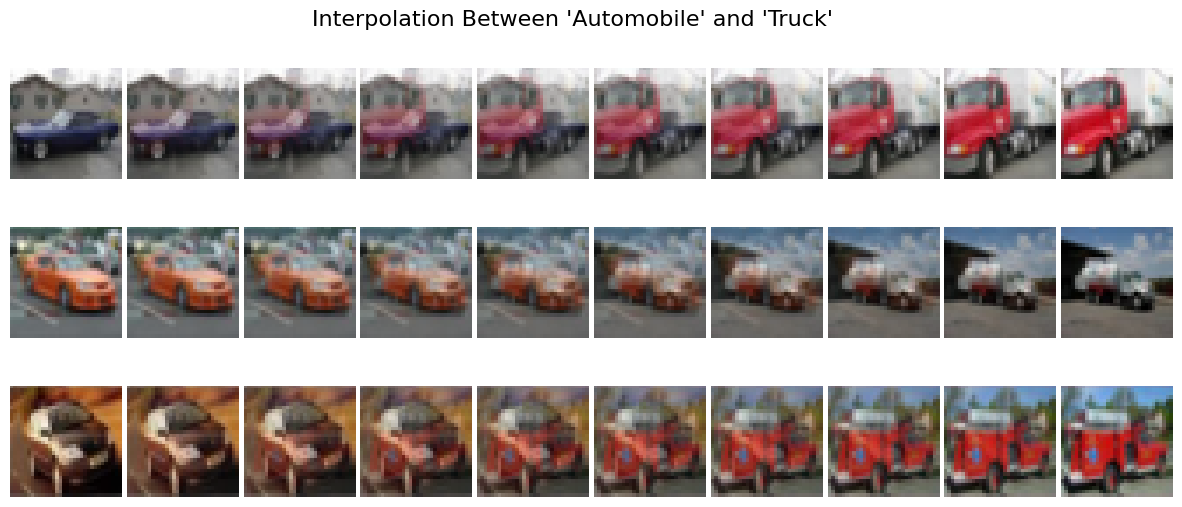

In [25]:
# Plot interpolated images in a grid (three rows)
plt.figure(figsize=(15, 6))  # Adjust height to reduce vertical spacing

for row_idx, row in enumerate(rows):
    for col_idx, img in enumerate(row):
        # Denormalize for visualization
        img = img * 0.5 + 0.5  # Convert range from [-1, 1] to [0, 1]
        img_np = img.numpy().transpose(1, 2, 0)  # Convert to H x W x C for plotting

        # Plot the image
        plt.subplot(num_rows, len(alphas), row_idx * len(alphas) + col_idx + 1)
        plt.imshow(img_np)
        plt.axis('off')

plt.suptitle("Interpolation Between 'Automobile' and 'Truck'", fontsize=16, y=0.95)

# Adjust layout to remove excessive white space
plt.subplots_adjust(wspace=0.05, hspace=0.1)  # Reduce horizontal and vertical spacing
plt.show()